In [58]:
from explore import ExploreTuningResults as etr
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
result_json = "jaguar11.json"
experiment = "cache_random_tune"

data_explorer = etr(result_json)

df = data_explorer.build_dataframe(experiment)

Get results for 1 tuning configs.


In [8]:
df = df.drop(["Template:"], axis=1)

In [9]:
df.columns

Index(['measurements', 'temps', 'voluntary_switches', 'invluntary_switches',
       'INSTR1', 'INSTR2', 'INSTR3', 'INSTR4', 'INSTR5', 'SIZE', 'STRIDE'],
      dtype='object')

In [10]:
df["measurements"].describe()

count    2.484000e+04
mean     1.290748e+06
std      3.300291e+05
min      8.785280e+05
25%      1.005606e+06
50%      1.211636e+06
75%      1.429063e+06
max      2.446886e+06
Name: measurements, dtype: float64

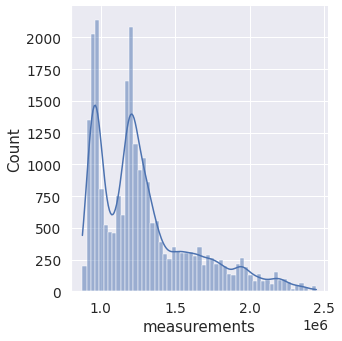

In [53]:
sns.displot(df["measurements"], kde=True)

((array([-4.02986804, -3.81630508, -3.6995535 , ...,  3.6995535 ,
          3.81630508,  4.02986804]),
  array([ 878528.,  885428.,  885781., ..., 2446239., 2446755., 2446886.])),
 (310813.48931640625, 1290747.5732689213, 0.941647205993173))

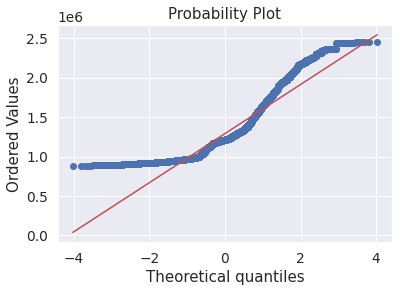

In [59]:
stats.probplot(df['measurements'], plot=plt)

((array([-4.02986804, -3.81630508, -3.6995535 , ...,  3.6995535 ,
          3.81630508,  4.02986804]),
  array([13.68600306, 13.69382642, 13.69422502, ..., 14.7100623 ,
         14.71027321, 14.71032675])),
 (0.2281023255375099, 14.041556347531106, 0.9679928702537007))

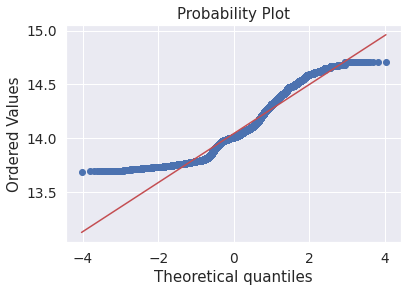

In [60]:
stats.probplot(np.log(df['measurements']), plot=plt)

In [14]:
print("Skewness: %f" % df["measurements"].skew())
print("Kurtosis: %f" % df["measurements"].kurt())

Skewness: 1.142982
Kurtosis: 0.760101


In [19]:
def bplot(x, y):
    data = pd.concat([df[y], df[x]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=x, y=y, data=data)

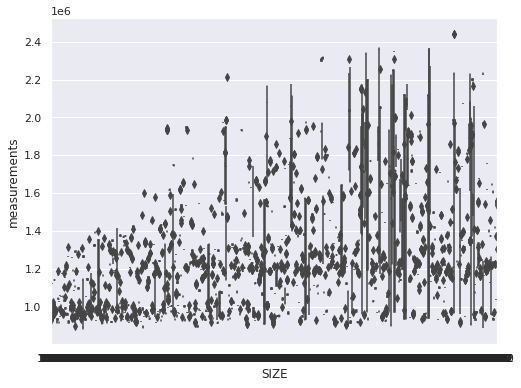

In [22]:
bplot("SIZE", "measurements")

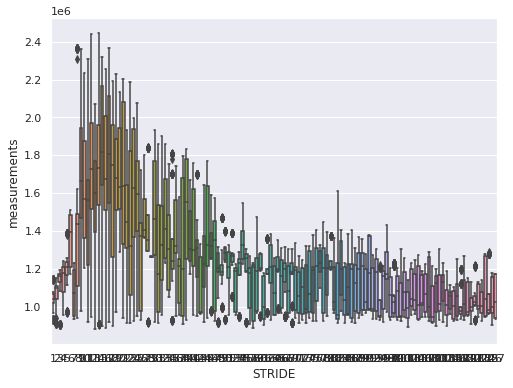

In [21]:
bplot("STRIDE", "measurements")

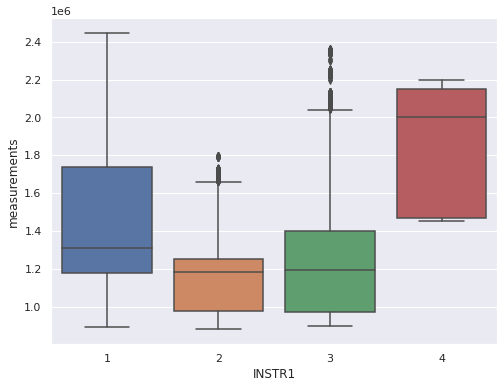

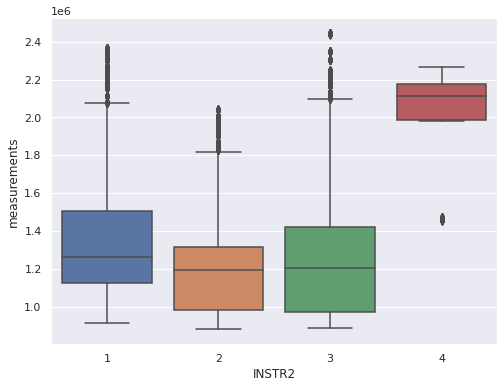

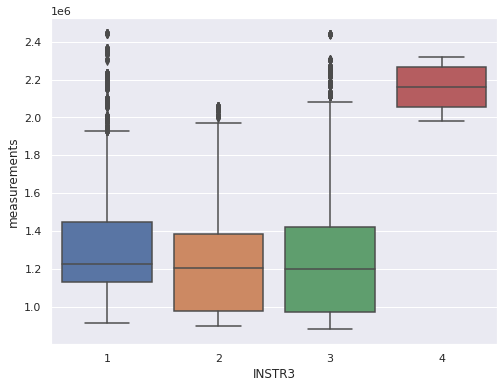

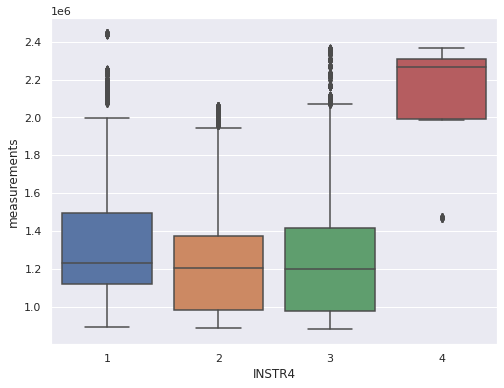

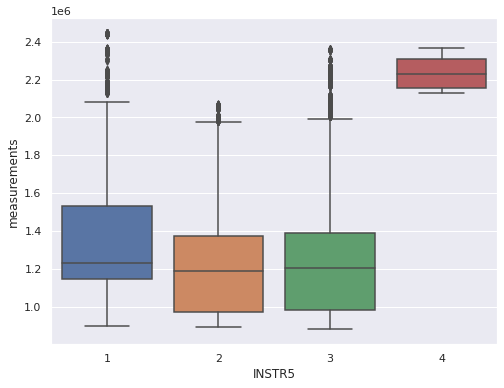

In [25]:
for instr in ["INSTR1", "INSTR2", "INSTR3", "INSTR4", "INSTR5"]:
    bplot(instr, "measurements")

<AxesSubplot:>

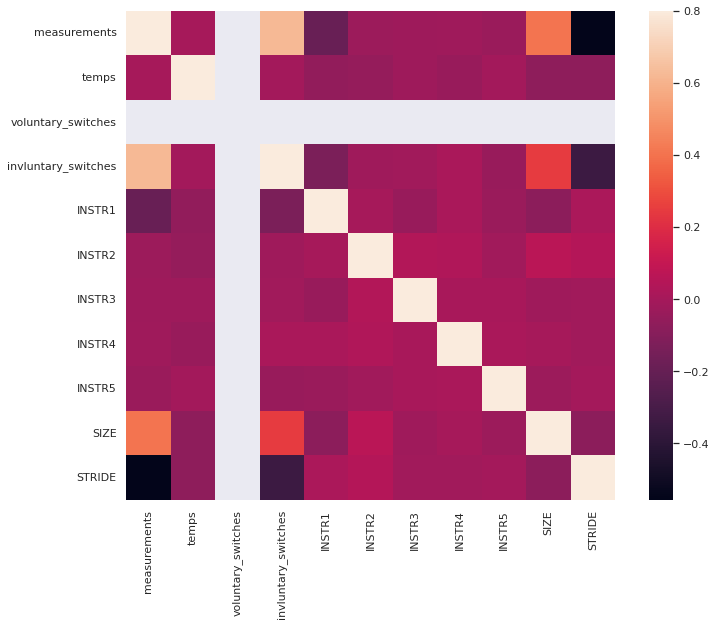

In [26]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

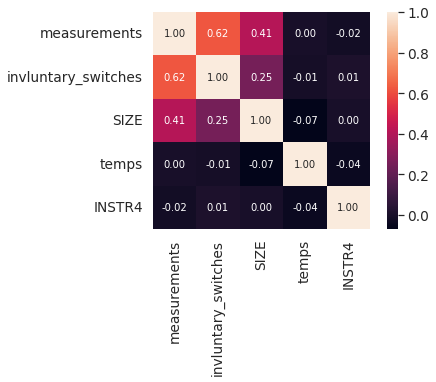

In [30]:
k = 5
cols = corrmat.nlargest(k, "measurements")["measurements"].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

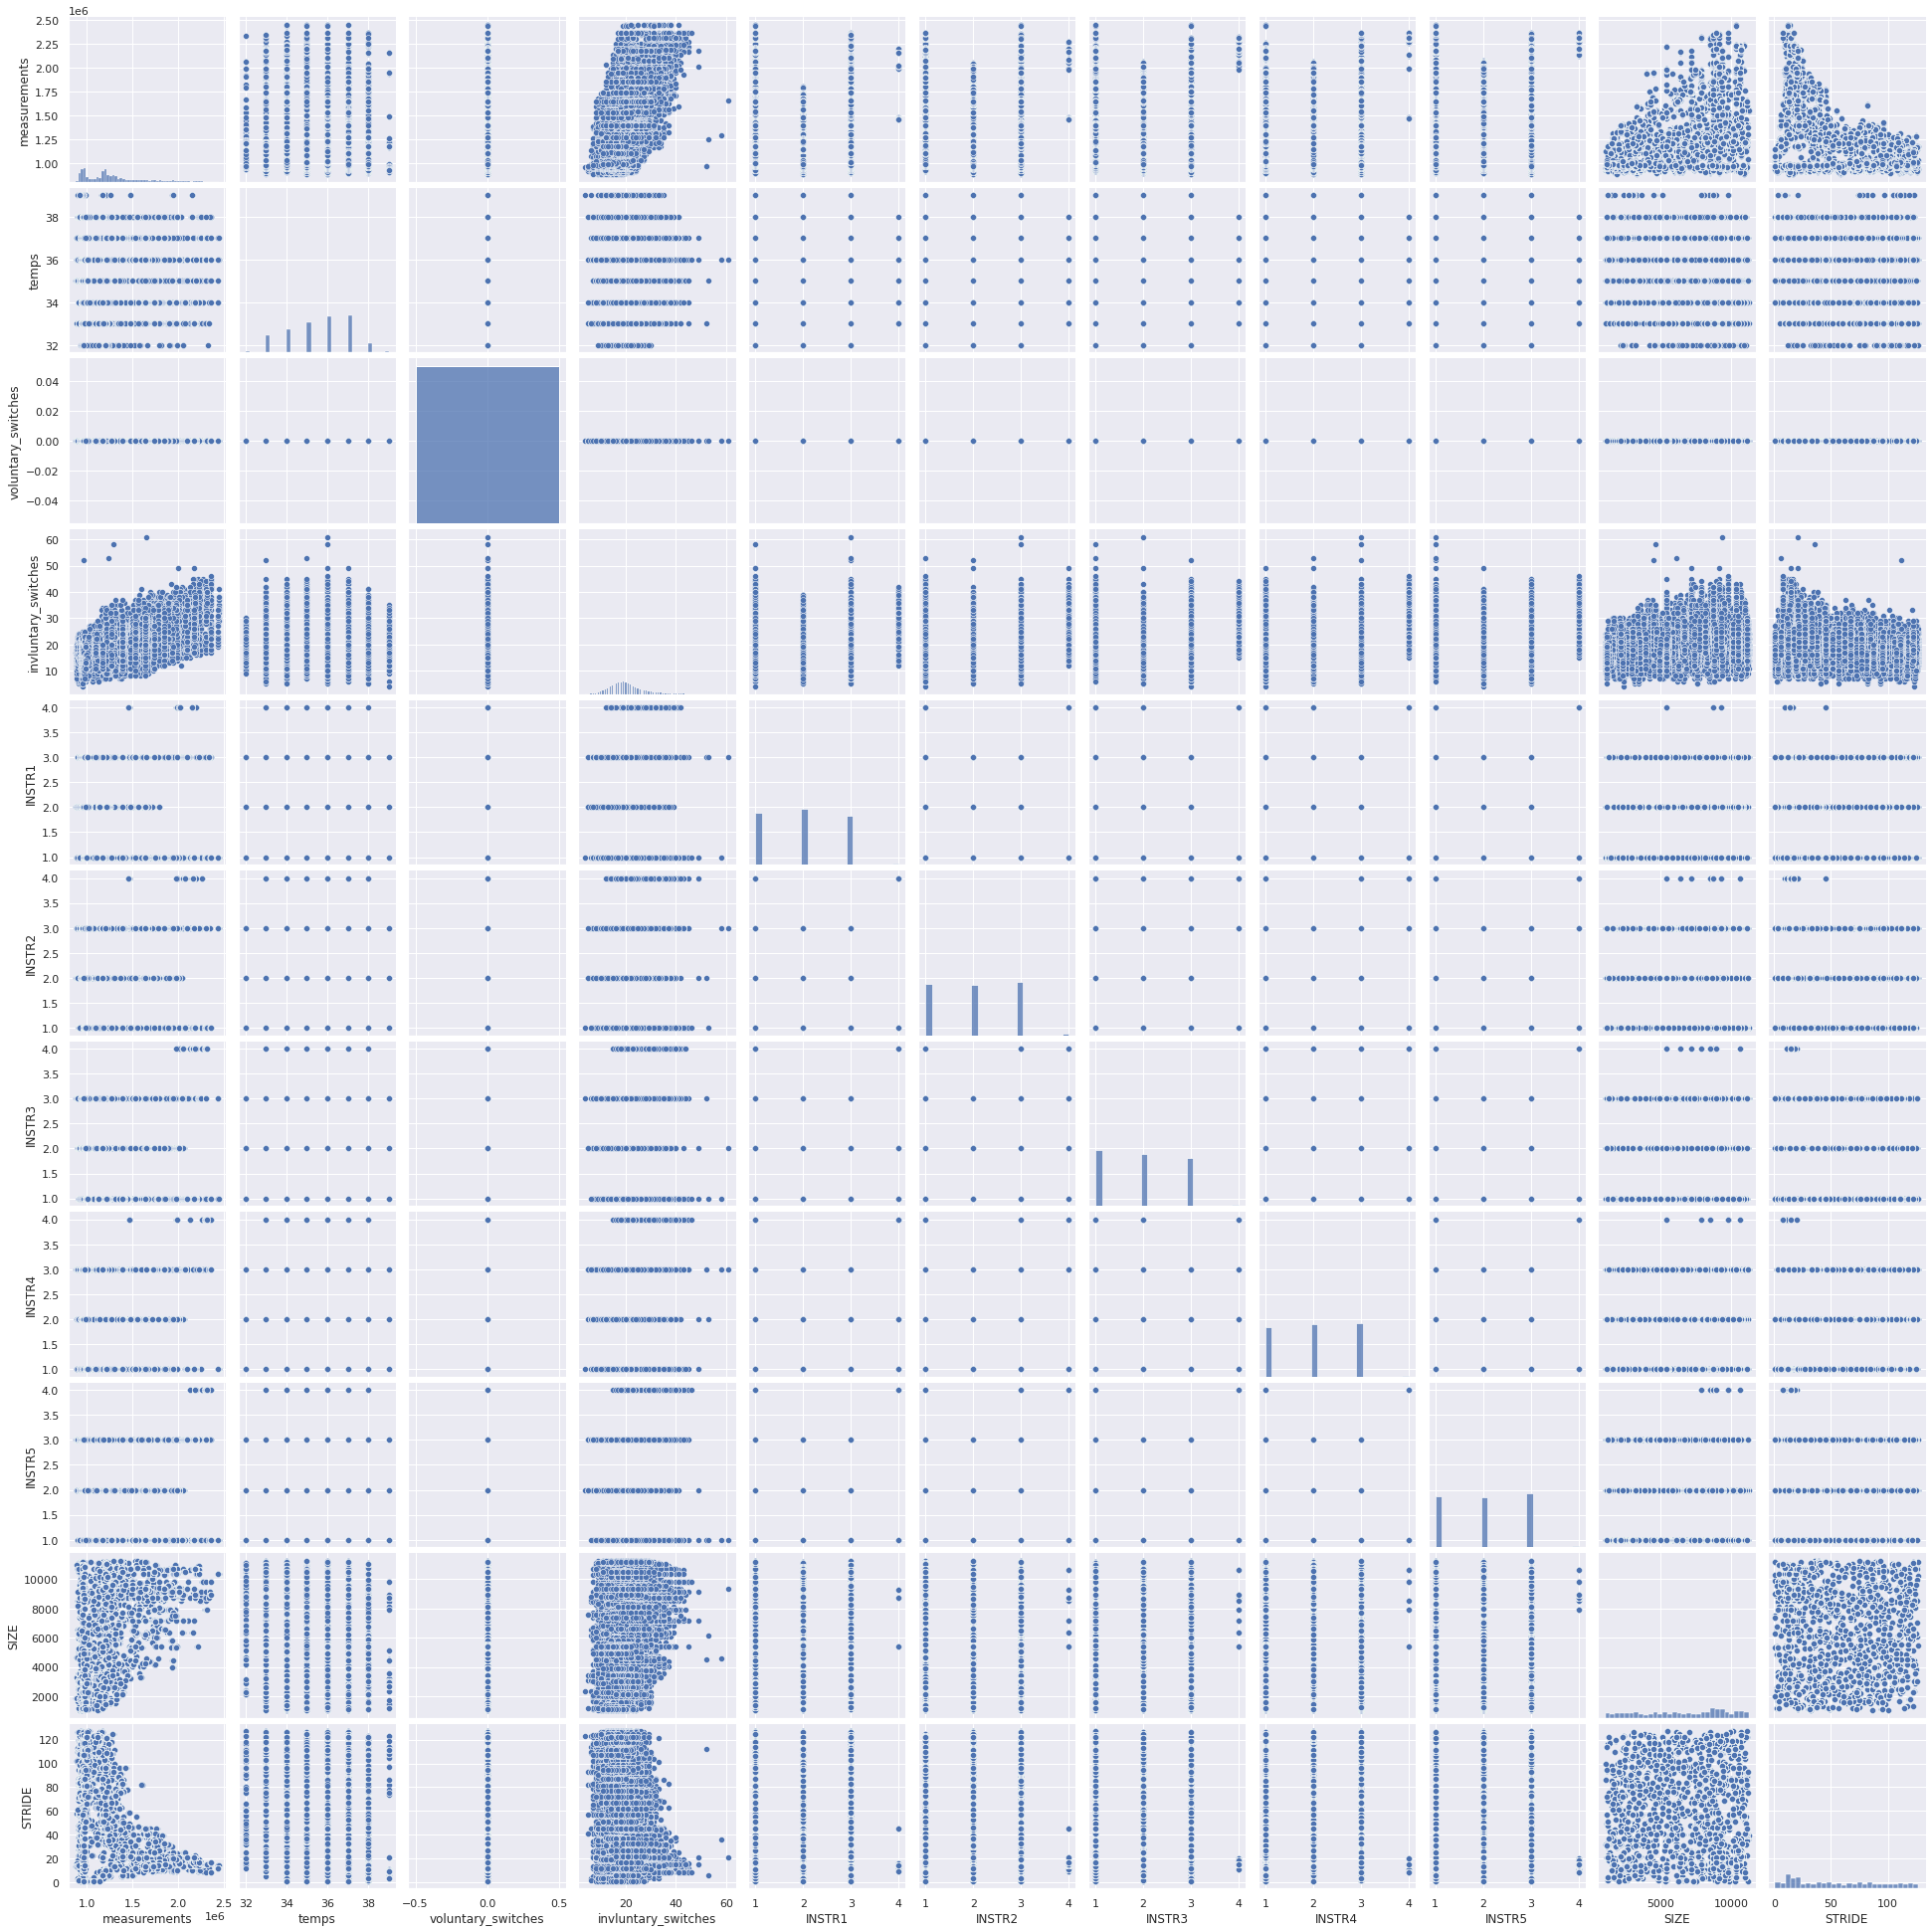

In [6]:
sns.set()
sns.pairplot(df)

In [31]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
measurements,0,0.0
temps,0,0.0
voluntary_switches,0,0.0
invluntary_switches,0,0.0
INSTR1,0,0.0
INSTR2,0,0.0
INSTR3,0,0.0
INSTR4,0,0.0
INSTR5,0,0.0
SIZE,0,0.0


In [46]:
#standardizing data
measurements_scaled = StandardScaler().fit_transform(df['measurements'].to_numpy()[:,np.newaxis])
low_range = measurements_scaled[measurements_scaled[:,0].argsort()][:10]
high_range= measurements_scaled[measurements_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.24906516]
 [-1.22815749]
 [-1.22708787]
 [-1.2267091 ]
 [-1.22627883]
 [-1.2252789 ]
 [-1.22522739]
 [-1.22416988]
 [-1.22340024]
 [-1.22336691]]

outer range (high) of the distribution:
[[3.49634197]
 [3.49639348]
 [3.49686618]
 [3.49811458]
 [3.49826911]
 [3.49879635]
 [3.49889634]
 [3.50125073]
 [3.50281426]
 [3.5032112 ]]


In [43]:
low_range

array([[-1.24906516],
       [-1.22815749],
       [-1.22708787],
       [-1.2267091 ],
       [-1.22627883],
       [-1.2252789 ],
       [-1.22522739],
       [-1.22416988],
       [-1.22340024],
       [-1.22336691]])

In [48]:
def splot(x, y):
    data = pd.concat([df[y], df[x]], axis=1)
    data.plot.scatter(x=x, y=y, c='b')

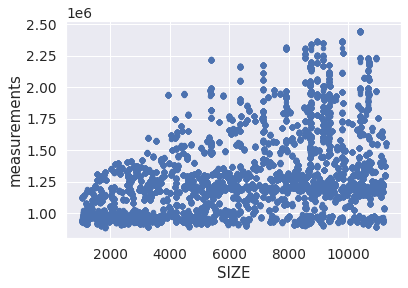

In [49]:
splot("SIZE", "measurements")